In [3]:
import sys
print(sys.version_info)

import keras
print(keras.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


Using TensorFlow backend.


2.3.1


In [2]:
# global parameters

eq_steps = 1000
N = 32
nt = 10000

In [3]:
# make sure corresponding files are prepared

df_train = pd.read_csv(f'Samples/train_N{N}steps{eq_steps}nt{nt}.csv')
df_test = pd.read_csv(f'Samples/test_N{N}steps{eq_steps}nt{nt}.csv')
df_train.rename(columns={f'{N*N}': 'Phase', f'{N*N+1}': 'InvTemp'}, inplace=True)
df_test.rename(columns={f'{N*N}': 'Phase', f'{N*N+1}': 'InvTemp'}, inplace=True)

In [4]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,Phase,InvTemp
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.737237
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.543841
2,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.376630
3,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.355009
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,0.0,0.532060


In [5]:
df_train.iloc[0:2,0:N*N]

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


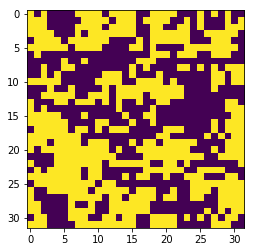

In [6]:
i = np.random.randint(0, nt//2)
plt.imshow(df_train.iloc[i,0:N*N].values.reshape((N, N)))

In [7]:
train_lattices = df_train.iloc[:,0:N*N]
train_labels = df_train['Phase']
test_lattices = df_test.iloc[:,0:N*N]
test_labels = df_test['Phase']

In [8]:
test_lattices.shape

(5000, 1024)

In [9]:
train_lattices = train_lattices.values.reshape((-1, N, N, 1))
test_lattices = test_lattices.values.reshape((-1, N, N, 1))
input_shape = (N, N, 1)

In [10]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.regularizers import l2

In [11]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network = models.Sequential()
network.add(layers.InputLayer(input_shape))
network.add(layers.Flatten())
network.add(layers.Dense(100, activation='sigmoid', kernel_regularizer=l2(0.01)))
#network.add(layers.Activation('sigmoid'))
network.add(layers.Dense(2, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
network.fit(train_lattices, train_labels, epochs=100, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5000/5000 [==============================] - 2s 305us/step - loss: 2.0205 - acc: 0.4752
Epoch 2/100
5000/5000 [==============================] - 0s 70us/step - loss: 1.2834 - acc: 0.5864
Epoch 3/100
5000/5000 [==============================] - 0s 65us/step - loss: 0.9439 - acc: 0.6440
Epoch 4/100
5000/5000 [==============================] - 0s 67us/step - loss: 0.7715 - acc: 0.6930
Epoch 5/100
5000/5000 [==============================] - 0s 65us/step - loss: 0.6689 - acc: 0.7880
Epoch 6/100
5000/5000 [==============================] - 0s 67us/step - loss: 0.5974 - acc: 0.8664
Epoch 7/100
5000/5000 [==============================] - 0s 64us/step - loss: 0.5467 - acc: 0.8788
Epoch 8/100
5000/5000 [==============================] - 0s 67us/step - loss: 0.5024 - acc: 0.8894
Epoch 9/100
5000/5000 [==============================] - 0s 66us/step - loss: 0.4664 - acc: 0.8958
Epoch 10/100
5000/5000 [==============================] - 0s

5000/5000 [==============================] - 0s 59us/step - loss: 0.0974 - acc: 0.9834
Epoch 80/100
5000/5000 [==============================] - 0s 55us/step - loss: 0.0907 - acc: 0.9848
Epoch 81/100
5000/5000 [==============================] - 0s 64us/step - loss: 0.0955 - acc: 0.9842
Epoch 82/100
5000/5000 [==============================] - 0s 53us/step - loss: 0.0861 - acc: 0.9884
Epoch 83/100
5000/5000 [==============================] - 0s 57us/step - loss: 0.0875 - acc: 0.9856
Epoch 84/100
5000/5000 [==============================] - 0s 45us/step - loss: 0.0831 - acc: 0.9902
Epoch 85/100
5000/5000 [==============================] - 0s 65us/step - loss: 0.1058 - acc: 0.9788
Epoch 86/100
5000/5000 [==============================] - 0s 63us/step - loss: 0.1031 - acc: 0.9806
Epoch 87/100
5000/5000 [==============================] - 0s 55us/step - loss: 0.0974 - acc: 0.9856
Epoch 88/100
5000/5000 [==============================] - 0s 53us/step - loss: 0.0789 - acc: 0.9918
Epoch 89/100


In [14]:
test_loss, test_acc = network.evaluate(test_lattices, test_labels)
print('Neural network accuracy on test set:', test_acc)

5000/5000 [==============================] - 0s 72us/step
Neural network accuracy on test set: 0.967


In [15]:
#for tSNE
train_lattices_tsne = df_train.iloc[:,0:N*N].values
test_lattices_tsne = df_test.iloc[:,0:N*N].values
train_labels_tsne = df_train['Phase']

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
X_reduced = pca.fit_transform(train_lattices_tsne)

In [47]:
X_reduced.shape

(5000, 150)

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=100, metric='euclidean')

X_tsne = tsne.fit_transform(X_reduced)

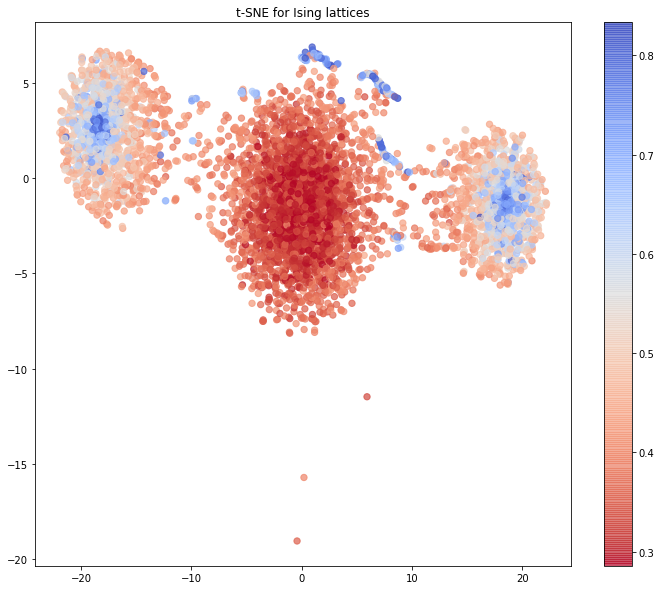

In [51]:
import matplotlib as mpl
train_labels_tsne = df_train['InvTemp']

# Visualize
plt.figure(figsize=(12,10))

plt.scatter(
    X_tsne[:,0],
    X_tsne[:,1],
    c=train_labels_tsne,
    alpha=0.7,
    s=40,
    cmap=mpl.cm.coolwarm_r
)

plt.colorbar();  # add colorbar with mapping: color --> class
plt.title('t-SNE for Ising lattices');